<a href="https://colab.research.google.com/github/The-AI-Garage/wasteSorting/blob/main/WasteSorting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SetUp 🔧

In [1]:
%pip install ultralytics --quiet
%pip install roboflow --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.4/750.4 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.1/74.1 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.1 MB/s eta 0:00:00


In [2]:
# import libraries
import cv2 as cv
from ultralytics import YOLO
from PIL import Image, ImageDraw
import os
import random
import matplotlib.pyplot as plt

# Load dataset 📦

In [3]:
from roboflow import Roboflow
rf = Roboflow(api_key="Z4eEFTB3u7x2DiKg2rgd")
project = rf.workspace("test-052ps").project("wastesorting-efkqk")
version = project.version(1)
dataset = version.download("yolov9")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to WasteSorting-1 in yolov9:: 100%|██████████| 3010/3010 [00:13<00:00, 215.44it/s]


#EDA ⚡

In [5]:
# check random images from the dataset
images = ['/content/WasteSorting-1/train/images/' + random.choice(os.listdir('/content/WasteSorting-1/train/images/')) for i in range(10)]
images

['/content/WasteSorting-1/train/images/000031_jpg.rf.86dd80b6fb71c674585763d43dc6fa45.jpg',
 '/content/WasteSorting-1/train/images/000079_JPG.rf.47aa4bdc4742f9fb13c8d6dee9422338.jpg',
 '/content/WasteSorting-1/train/images/000007_JPG.rf.0cf36086c82af6755260f597708b0403.jpg',
 '/content/WasteSorting-1/train/images/000039_jpg.rf.005af441010ab61bf1518c78008b4633.jpg',
 '/content/WasteSorting-1/train/images/000102_JPG.rf.06006877bd27b0bb80706eeb9239cd5d.jpg',
 '/content/WasteSorting-1/train/images/000040_jpg.rf.95064efe75c18ca0b99c3becabe6f42f.jpg',
 '/content/WasteSorting-1/train/images/000005_jpg.rf.40aaa6f17d93fdbe11bc6f904a7a1447.jpg',
 '/content/WasteSorting-1/train/images/000010_JPG.rf.c16d653b24be1513314791f86bc70441.jpg',
 '/content/WasteSorting-1/train/images/000013_jpg.rf.438cb6e961dcd0270c146e5e86c0451c.jpg',
 '/content/WasteSorting-1/train/images/000023_jpg.rf.eb3c8c913cecee6ec780b591fac786ec.jpg']

In [6]:
# function to print images
def show_images(img_path: list, row: int, col: int):
    figure = plt.figure(figsize=(18,18))
    for i in range(len(img_path)):
        figure.add_subplot(row,col,i+1)
        img = cv.imread(img_path[i])
        plt.imshow(img)
        figure.tight_layout(pad=1)
    plt.show

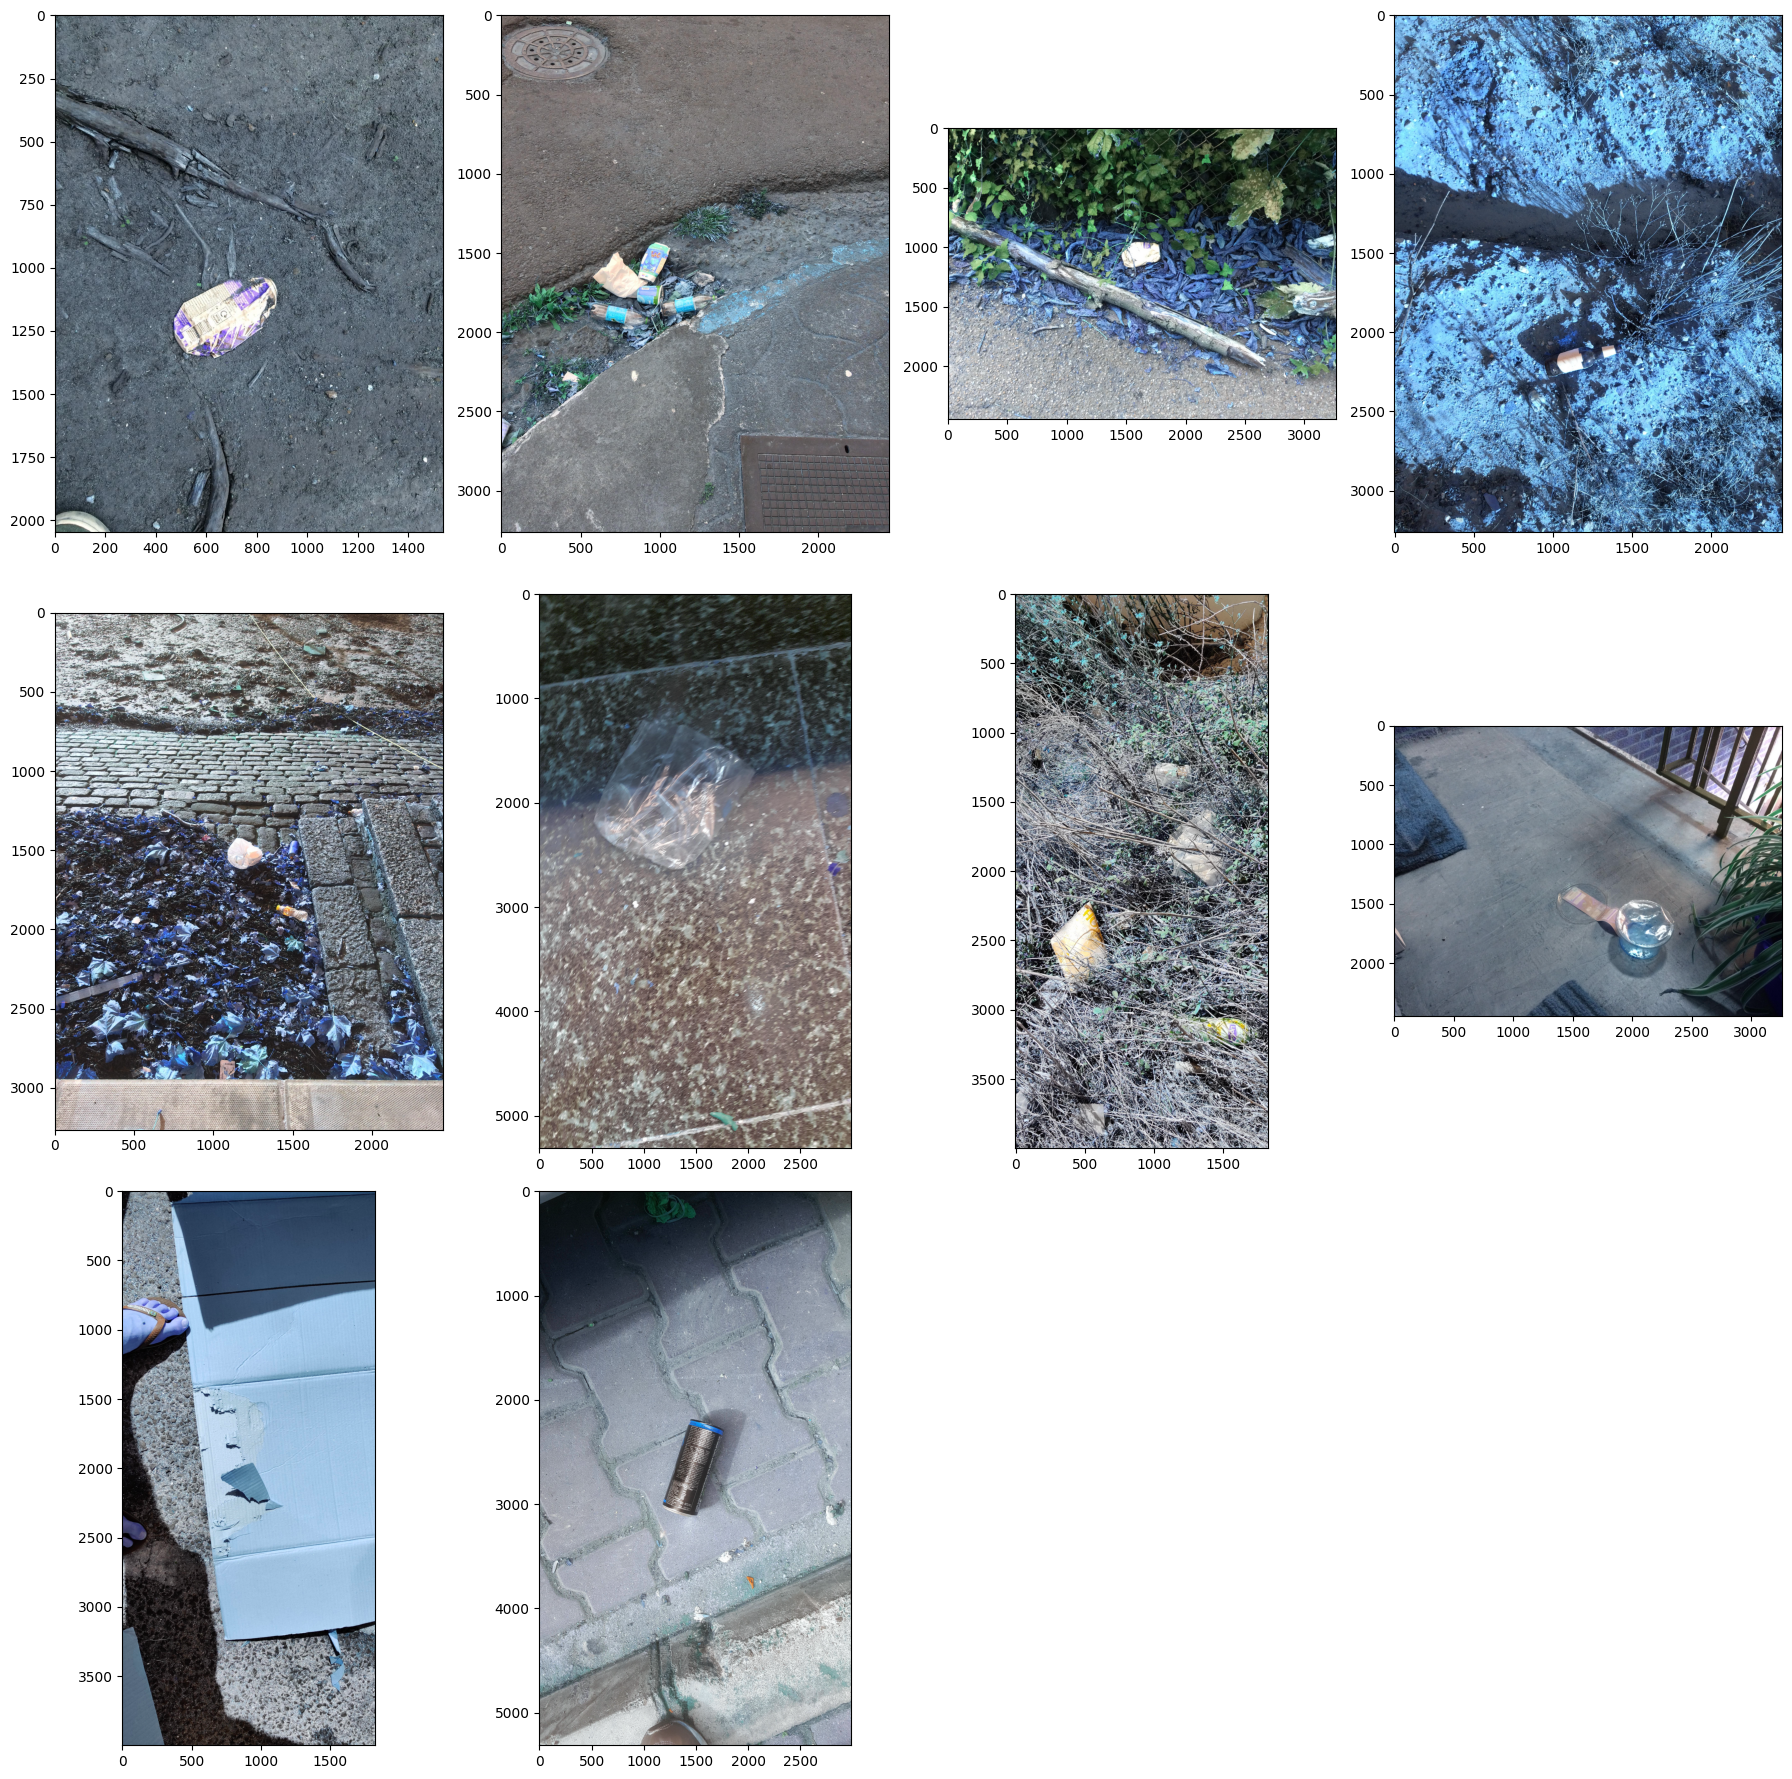

In [7]:
show_images(images, 3, 4)

**Observation**

*   Images with different resolutions.
*   There are not many objects in a single image.
*   Different lighting and brightness.
*   This dataset was build for a object segmentation task.



In [9]:
count = 0
for root_dir, dir, files in os.walk('/content/WasteSorting-1/train/images/'):
  count += len(files)
print(f'train images: {count}')

train images: 1049


In [10]:
count = 0
for root_dir, dir, files in os.walk('/content/WasteSorting-1/test/images/'):
  count += len(files)
print(f'test images: {count}')

test images: 150


In [11]:
count = 0
for root_dir, dir, files in os.walk('/content/WasteSorting-1/valid/images/'):
  count += len(files)
print(f'valid images: {count}')

valid images: 300


**Loading version of the dataset preprocessed with resizing 640x640**

In [3]:
from roboflow import Roboflow
rf = Roboflow(api_key="Z4eEFTB3u7x2DiKg2rgd")
project = rf.workspace("test-052ps").project("wastesorting-efkqk")
version = project.version(2)
dataset = version.download("yolov9")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to WasteSorting-2 in yolov9:: 100%|██████████| 3010/3010 [00:00<00:00, 3587.37it/s]


In [13]:
images = ['/content/WasteSorting-2/train/images/' + random.choice(os.listdir('/content/WasteSorting-2/train/images/')) for i in range(10)]
images

['/content/WasteSorting-2/train/images/000075_jpg.rf.d543e6c8772efef4095bb57589c70635.jpg',
 '/content/WasteSorting-2/train/images/000013_jpg.rf.4824a7ee4bb882c70b7ad3993f4d2524.jpg',
 '/content/WasteSorting-2/train/images/000074_JPG.rf.8553147c7c2c5e1eac3f8e87dad5cfe5.jpg',
 '/content/WasteSorting-2/train/images/000069_jpg.rf.f72ec501cf59b7bcf31e04a746d23dcd.jpg',
 '/content/WasteSorting-2/train/images/000003_jpg.rf.1c26617ac9c2e0ea11f82967f1b6624e.jpg',
 '/content/WasteSorting-2/train/images/000045_jpg.rf.caf5772b745e70a30d7a6d11b8d09f6e.jpg',
 '/content/WasteSorting-2/train/images/IMG_4865_JPG.rf.3a35db8596256517146bb1c6fffb2fd5.jpg',
 '/content/WasteSorting-2/train/images/000009_jpg.rf.8f919330e19d00e2a75dc5d655006592.jpg',
 '/content/WasteSorting-2/train/images/000137_JPG.rf.e35a9136fac4fc03a5a5a7ef0ef4921c.jpg',
 '/content/WasteSorting-2/train/images/000006_jpg.rf.cc89e699250b27303b03d0ca036b4fb8.jpg']

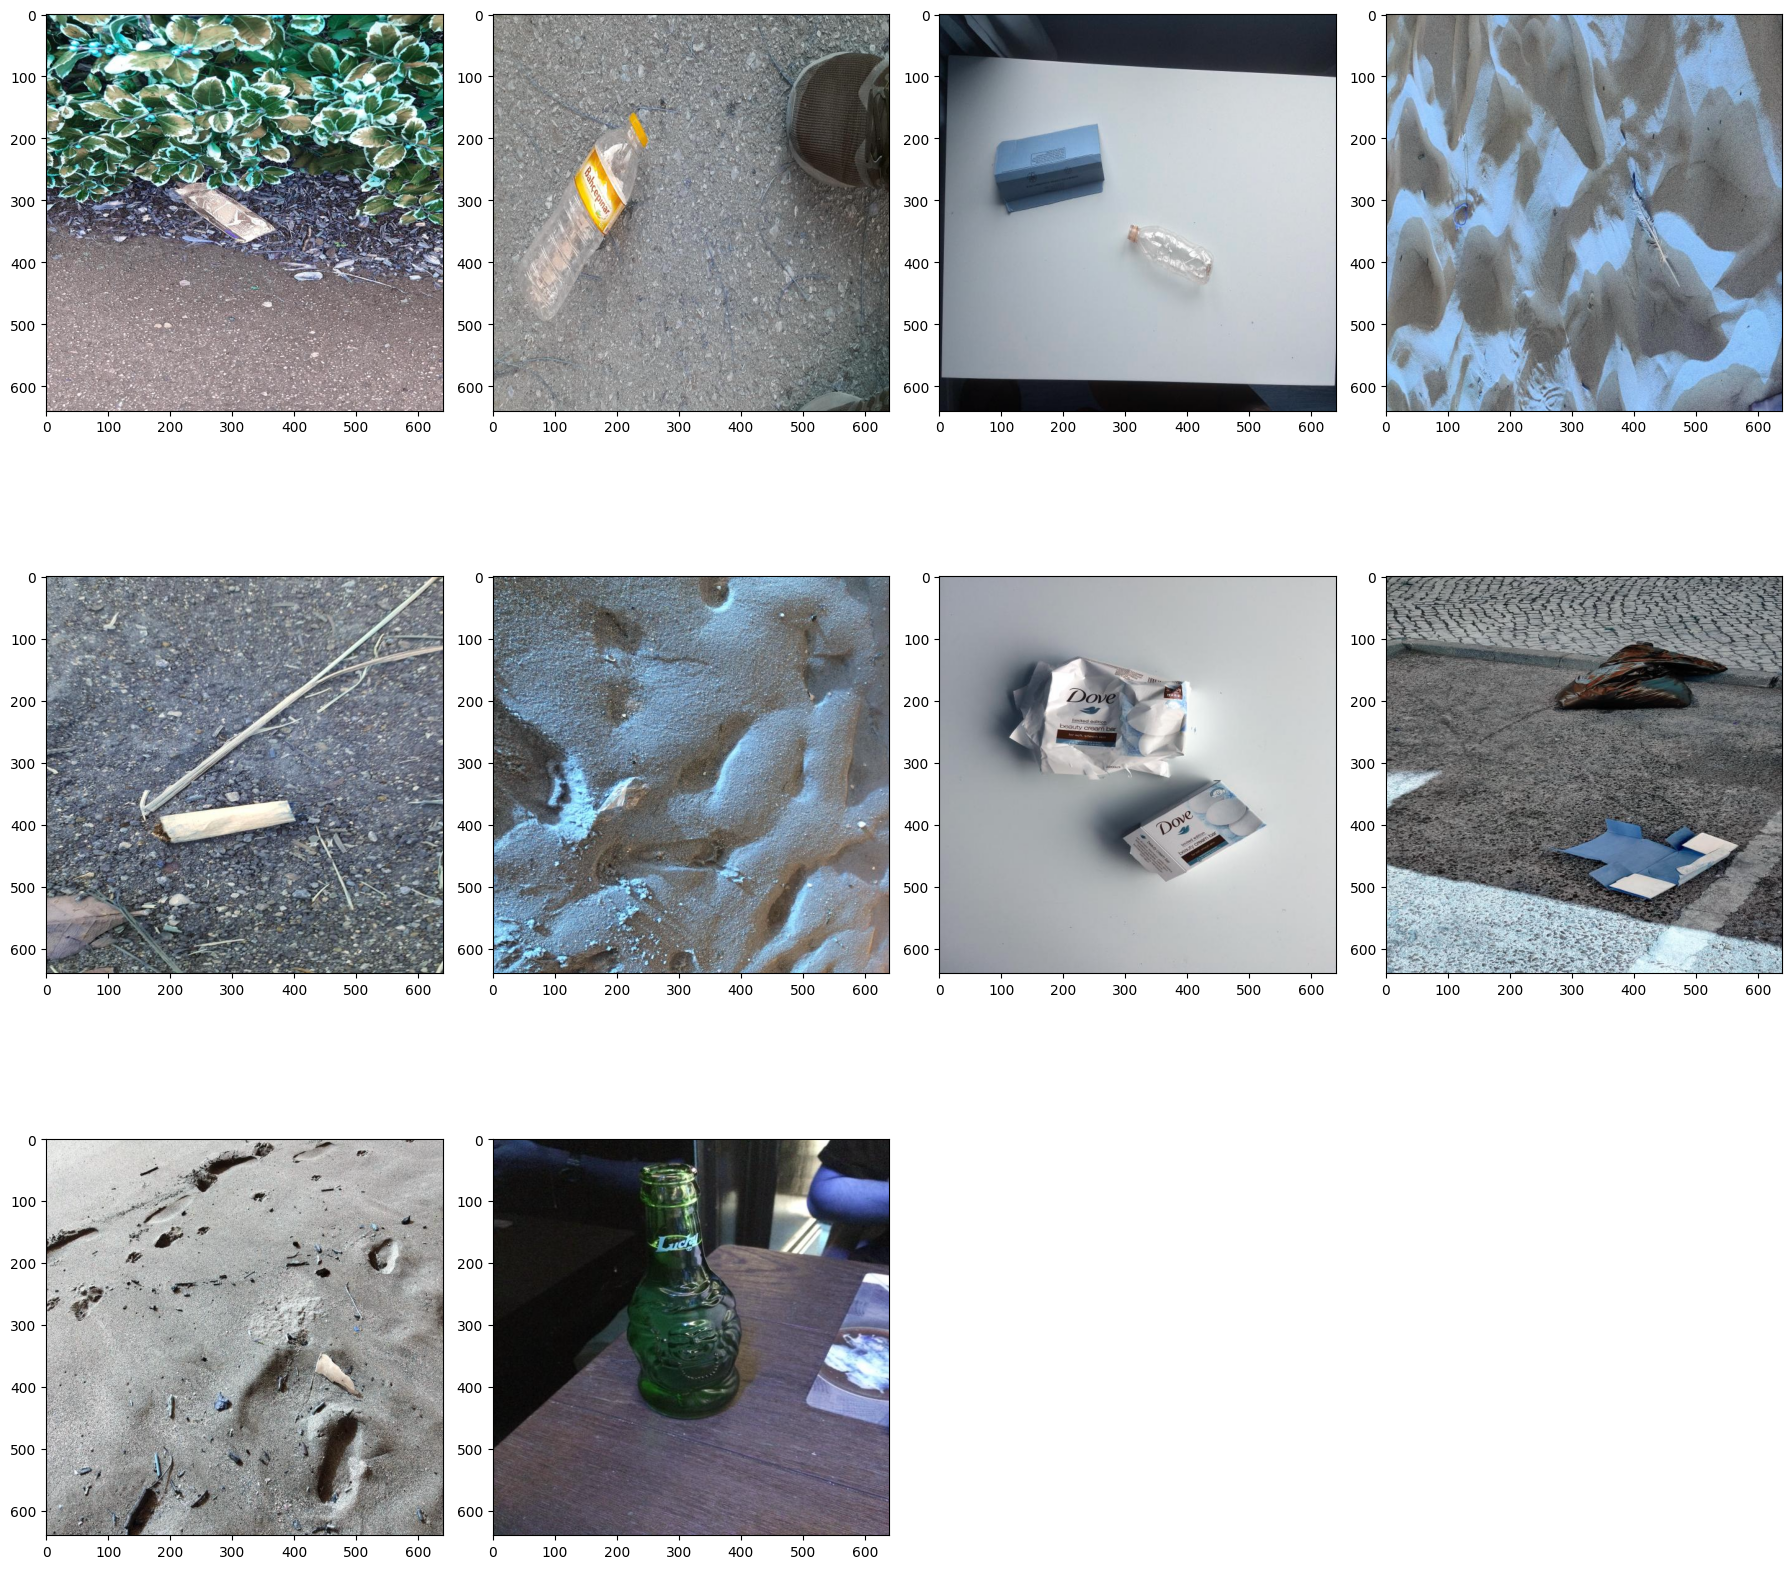

In [14]:
show_images(images, 3, 4)

There are around 59 classes on this dataset

names:
- Aerosol
- Aluminium blister pack
- Aluminium foil
- Battery
- Broken glass
- Carded blister pack
- Cigarette
- Clear plastic bottle
- Corrugated carton
- Crisp packet
- Disposable food container
- Disposable plastic cup
- Drink can
- Drink carton
- Egg carton
- Foam cup
- Foam food container
- Food Can
- Food waste
- Garbage bag
- Glass bottle
- Glass cup
- Glass jar
- Magazine paper
- Meal carton
- Metal bottle cap
- Metal lid
- Normal paper
- Other carton
- Other plastic
- Other plastic bottle
- Other plastic container
- Other plastic cup
- Other plastic wrapper
- Paper bag
- Paper cup
- Paper straw
- Pizza box
- Plastic bottle cap
- Plastic film
- Plastic glooves
- Plastic lid
- Plastic straw
- Plastic utensils
- Polypropylene bag
- Pop tab
- Rope - strings
- Scrap metal
- Shoe
- Single-use carrier bag
- Six pack rings
- Spread tub
- Squeezable tube
- Styrofoam piece
- Tissues
- Toilet tube
- Tupperware
- Unlabeled litter
- Wrapping paper

# Model for segmentation 🤖

In [5]:
# Testing YOLOv9
# Build a YOLOv9c model from pretrained weight
model = YOLO('yolov9c-seg.pt')

In [7]:
# Train the model
model_trained = model.train(data='/content/WasteSorting-2/data.yaml', epochs=100, imgsz=640)

Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov9c-seg.pt, data=/content/WasteSorting-2/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_co

100%|██████████| 6.23M/6.23M [00:00<00:00, 77.3MB/s]


AMP: checks passed ✅


train: Scanning /content/WasteSorting-2/train/labels... 1049 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1049/1049 [00:00<00:00, 1545.54it/s]


train: New cache created: /content/WasteSorting-2/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/WasteSorting-2/valid/labels... 300 images, 0 backgrounds, 0 corrupt: 100%|██████████| 300/300 [00:00<00:00, 707.08it/s]


val: New cache created: /content/WasteSorting-2/valid/labels.cache
Plotting labels to runs/segment/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000159, momentum=0.9) with parameter groups 163 weight(decay=0.0), 174 weight(decay=0.0005), 173 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      13.3G      1.005      2.332      4.552      1.149         59        640: 100%|██████████| 66/66 [01:09<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.18it/s]


                   all        300        979      0.396      0.125     0.0699     0.0612      0.396      0.116     0.0681     0.0555

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      13.4G     0.9703      2.008      3.449       1.09         48        640: 100%|██████████| 66/66 [01:04<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.17it/s]


                   all        300        979      0.387      0.126     0.0738      0.058      0.339      0.168     0.0734     0.0541

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      13.4G      1.032      2.061      3.265      1.139         47        640: 100%|██████████| 66/66 [01:04<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.17it/s]


                   all        300        979      0.424     0.0981     0.0616      0.048      0.422      0.097     0.0597     0.0444

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      13.5G      1.024      2.093      3.053      1.142         51        640: 100%|██████████| 66/66 [01:04<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.12it/s]


                   all        300        979      0.348     0.0938     0.0574     0.0437      0.314      0.108     0.0508     0.0359

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      13.4G     0.9929       1.98      2.885      1.141         71        640: 100%|██████████| 66/66 [01:05<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.16it/s]


                   all        300        979      0.379      0.103     0.0759     0.0592      0.377     0.0952     0.0725     0.0514

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      13.5G      1.021      1.939      2.762      1.133         40        640: 100%|██████████| 66/66 [01:06<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.16it/s]


                   all        300        979      0.388      0.151     0.0968     0.0788      0.382      0.144     0.0929     0.0703

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      13.4G      1.044      1.974      2.634      1.162         42        640: 100%|██████████| 66/66 [01:06<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.11it/s]


                   all        300        979      0.412      0.142      0.105     0.0828      0.408      0.127        0.1     0.0728

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      13.4G     0.9682      1.871      2.536      1.118         72        640: 100%|██████████| 66/66 [01:07<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.22it/s]


                   all        300        979      0.404      0.136      0.106     0.0856      0.401      0.136      0.104     0.0759

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      13.4G     0.9356      1.822      2.405      1.107         24        640: 100%|██████████| 66/66 [01:05<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.17it/s]


                   all        300        979      0.632     0.0836      0.111     0.0859      0.606     0.0809      0.104     0.0762

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      13.4G     0.9469      1.847      2.391      1.127         20        640: 100%|██████████| 66/66 [01:05<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.18it/s]


                   all        300        979      0.467      0.148      0.129     0.0989      0.467       0.15      0.128     0.0867

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      13.4G     0.9202      1.717       2.27      1.077         26        640: 100%|██████████| 66/66 [01:05<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.20it/s]

                   all        300        979      0.352      0.163      0.127     0.0994      0.349       0.16      0.127     0.0881



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      13.4G     0.9607      1.798      2.229      1.096         35        640: 100%|██████████| 66/66 [01:05<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.15it/s]


                   all        300        979      0.468      0.124      0.122      0.101      0.464      0.118      0.119     0.0908

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      13.4G     0.9246      1.735      2.196      1.094         38        640: 100%|██████████| 66/66 [01:05<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.17it/s]


                   all        300        979      0.368      0.128      0.108     0.0851      0.367      0.126      0.105     0.0777

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      13.5G      0.877      1.595      2.041      1.058         37        640: 100%|██████████| 66/66 [01:05<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.16it/s]


                   all        300        979      0.521      0.139      0.133      0.106      0.503      0.126      0.121      0.088

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      13.4G     0.8822      1.584      2.021      1.066         58        640: 100%|██████████| 66/66 [01:05<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.17it/s]


                   all        300        979      0.399      0.135       0.13      0.103      0.394      0.131      0.124     0.0909

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      13.4G     0.8589      1.539      1.892      1.052         38        640: 100%|██████████| 66/66 [01:05<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.19it/s]

                   all        300        979      0.403      0.142      0.148       0.12      0.394      0.136      0.137      0.101



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      13.4G     0.8464      1.569      1.844      1.034         41        640: 100%|██████████| 66/66 [01:05<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.18it/s]

                   all        300        979      0.322      0.165      0.152      0.127      0.294      0.154       0.14      0.101



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100      13.4G     0.8409      1.507       1.82      1.038         41        640: 100%|██████████| 66/66 [01:05<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.16it/s]

                   all        300        979      0.225      0.224      0.151      0.127       0.37      0.156      0.146       0.11



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100      13.5G     0.8263      1.503      1.767       1.03         28        640: 100%|██████████| 66/66 [01:05<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.18it/s]


                   all        300        979      0.408      0.144      0.123     0.0992      0.403       0.14      0.115     0.0834

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100      13.4G     0.8044       1.41      1.711      1.023         48        640: 100%|██████████| 66/66 [01:05<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.19it/s]

                   all        300        979      0.462      0.141      0.145       0.12      0.459      0.138      0.136      0.103



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100      13.4G     0.7872      1.363      1.645      1.016         27        640: 100%|██████████| 66/66 [01:05<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.18it/s]

                   all        300        979      0.386      0.137      0.132      0.105       0.38      0.134      0.127     0.0902



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100      13.5G     0.7923      1.414      1.606      1.021         39        640: 100%|██████████| 66/66 [01:05<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.13it/s]

                   all        300        979      0.362      0.173      0.135      0.105      0.277      0.177      0.128       0.09



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100      13.4G     0.7786      1.373      1.545      1.011         29        640: 100%|██████████| 66/66 [01:05<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.20it/s]

                   all        300        979      0.503       0.15      0.143      0.119      0.505       0.15      0.141      0.102



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100      13.4G     0.7853      1.385      1.503      1.011         33        640: 100%|██████████| 66/66 [01:05<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.18it/s]

                   all        300        979      0.293      0.211      0.153      0.121      0.282      0.203      0.137     0.0961



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100      13.4G     0.7839      1.347       1.46      1.006         69        640: 100%|██████████| 66/66 [01:05<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.18it/s]


                   all        300        979      0.367      0.175      0.139      0.111       0.38       0.16      0.128     0.0936

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      13.5G     0.7596      1.356      1.429     0.9852         46        640: 100%|██████████| 66/66 [01:05<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.17it/s]


                   all        300        979      0.402      0.166      0.155      0.126      0.398      0.161      0.147      0.107

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      13.4G     0.7669       1.35      1.423      1.002         21        640: 100%|██████████| 66/66 [01:05<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.18it/s]

                   all        300        979       0.33      0.236       0.14      0.113      0.327      0.234      0.137      0.102



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100      13.4G     0.7537      1.321      1.358     0.9783         40        640: 100%|██████████| 66/66 [01:06<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.16it/s]

                   all        300        979       0.46      0.152      0.156      0.129      0.459       0.15       0.15      0.113



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100      13.4G      0.739      1.291      1.269     0.9864         54        640: 100%|██████████| 66/66 [01:05<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.18it/s]

                   all        300        979      0.315       0.17      0.138       0.11      0.312      0.165      0.134     0.0973



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100      13.5G     0.7186      1.272      1.222     0.9824         40        640: 100%|██████████| 66/66 [01:05<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.15it/s]

                   all        300        979      0.371      0.173       0.15      0.121      0.345      0.168      0.145      0.105



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      13.4G     0.7186      1.237      1.199     0.9767         66        640: 100%|██████████| 66/66 [01:05<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.14it/s]

                   all        300        979      0.361      0.192      0.146      0.123      0.356      0.181      0.138      0.105



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100      13.4G     0.7554      1.305      1.245     0.9893         42        640: 100%|██████████| 66/66 [01:05<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.18it/s]

                   all        300        979      0.402       0.16      0.163      0.137      0.409      0.168      0.158      0.119



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100      13.3G     0.7239      1.234      1.191     0.9761         46        640: 100%|██████████| 66/66 [01:05<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.24it/s]

                   all        300        979      0.333      0.185      0.148      0.121      0.322      0.182      0.141      0.104



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100      13.5G     0.7211      1.224      1.171     0.9689         26        640: 100%|██████████| 66/66 [01:05<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.25it/s]

                   all        300        979      0.487      0.139      0.144      0.113      0.481      0.135      0.137      0.101



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100      13.4G     0.7126      1.225      1.116     0.9658         39        640: 100%|██████████| 66/66 [01:05<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        300        979      0.403       0.16      0.159       0.13      0.397      0.156      0.153      0.112



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100      13.4G     0.6878      1.167      1.087     0.9589         48        640: 100%|██████████| 66/66 [01:05<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.18it/s]


                   all        300        979      0.348      0.193      0.161      0.134      0.343      0.187      0.157      0.116

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      13.2G     0.6816      1.222      1.018     0.9566         34        640: 100%|██████████| 66/66 [01:05<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.21it/s]


                   all        300        979      0.319      0.191      0.164      0.138      0.288      0.194      0.157      0.118

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      13.5G     0.6845      1.178      1.028     0.9528         31        640: 100%|██████████| 66/66 [01:05<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.15it/s]

                   all        300        979      0.474      0.154      0.186      0.158      0.469      0.152      0.182       0.14



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100      13.4G       0.68      1.145     0.9867     0.9457         27        640: 100%|██████████| 66/66 [01:06<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.20it/s]

                   all        300        979      0.421      0.164      0.164      0.138      0.417      0.164      0.163       0.12



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100      13.2G     0.6714      1.124     0.9863     0.9468         38        640: 100%|██████████| 66/66 [01:05<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.19it/s]

                   all        300        979      0.335      0.205      0.169      0.142      0.326        0.2       0.16       0.12



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100      13.4G     0.7016      1.247      0.969     0.9453         50        640: 100%|██████████| 66/66 [01:06<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.20it/s]

                   all        300        979      0.427       0.15      0.172      0.143      0.389      0.164      0.166      0.127



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100      13.5G     0.6692      1.128     0.9269     0.9484         33        640: 100%|██████████| 66/66 [01:05<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.17it/s]

                   all        300        979      0.526      0.165      0.168      0.139      0.523      0.163      0.163      0.118



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100      13.4G     0.6539      1.087     0.9051     0.9373         57        640: 100%|██████████| 66/66 [01:05<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.20it/s]

                   all        300        979      0.394      0.172      0.163      0.136      0.397      0.174      0.158      0.117



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100      13.4G     0.6426      1.064      0.887     0.9438         48        640: 100%|██████████| 66/66 [01:05<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.22it/s]

                   all        300        979      0.442      0.157      0.181      0.153       0.44      0.156      0.177      0.134



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100      13.4G     0.6745       1.15      0.882     0.9406         79        640: 100%|██████████| 66/66 [01:05<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.19it/s]

                   all        300        979      0.382      0.169      0.165       0.14      0.356      0.176       0.16      0.127



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100      13.4G     0.6332      1.074     0.8606      0.939         43        640: 100%|██████████| 66/66 [01:05<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.22it/s]

                   all        300        979      0.393      0.179      0.153      0.129      0.391      0.177       0.15      0.112



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100      13.3G     0.6364      1.111     0.8455      0.944         44        640: 100%|██████████| 66/66 [01:05<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.20it/s]

                   all        300        979      0.454      0.171      0.165      0.141      0.433      0.171      0.164      0.124



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100      13.4G      0.637       1.07     0.8426     0.9311         38        640: 100%|██████████| 66/66 [01:05<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.16it/s]

                   all        300        979      0.398      0.158      0.159      0.131      0.415      0.154      0.155      0.116



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100      13.1G     0.6309      1.068     0.8252     0.9246         48        640: 100%|██████████| 66/66 [01:05<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.18it/s]

                   all        300        979      0.375      0.173      0.155      0.132      0.402      0.161      0.149      0.115



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100      13.4G     0.6129      1.047     0.7881     0.9152         52        640: 100%|██████████| 66/66 [01:05<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.18it/s]

                   all        300        979      0.379      0.171      0.161      0.136      0.379      0.168      0.157       0.12



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100      13.4G      0.623       1.04      0.787     0.9232         41        640: 100%|██████████| 66/66 [01:05<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.20it/s]

                   all        300        979      0.398      0.186      0.159      0.132      0.431      0.181       0.16      0.116



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100      13.4G     0.6244      1.029     0.7508     0.9143         37        640: 100%|██████████| 66/66 [01:05<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.25it/s]

                   all        300        979       0.35       0.21      0.179       0.15      0.383      0.183      0.174      0.131



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100      13.4G     0.6127      1.065     0.7498     0.9217         30        640: 100%|██████████| 66/66 [01:05<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.22it/s]

                   all        300        979      0.359      0.199      0.168      0.136      0.348      0.193      0.157      0.114



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100      13.4G     0.6121     0.9826      0.721     0.9016        122        640:  44%|████▍     | 29/66 [00:29<00:37,  1.00s/it]os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
     54/100      13.4G     0.6121     0.9826      0.721     0.9016        122        640:  44%|████▍     | 29/66 [00:29<00:38,  1.03s/it]


KeyboardInterrupt: 